In [1]:
import os
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thakrav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/thakrav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/thakrav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/thakrav/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import os
from paragraph_cleaner import ParagraphCleaner
from paragraph_analysis import ParagraphAnalysis
from utils import big_data_dict, styled_print, create_dir, extract_images, extract_paragraphs, \
    random_select_dict, combine_multiple_text_files


In [3]:
%load_ext autoreload
%autoreload 2

## House of Dragon Seasons

In [4]:
hod_root_data_path = "../data/processed-data/url-texts/house-of-dragons"
directories = ["characters", "episodes", "dragons", "differences"]

### Episodes

In [5]:
directories_key = 'episodes'

data_text_dir = create_dir("../data/processed-data", "clean-csvs")

data_dir = os.path.join(hod_root_data_path, directories_key)
txt_file = combine_multiple_text_files(data_dir)
raw_paragraphs = {}
with open(txt_file, "rt") as f:
    for i, line in enumerate(f):
        raw_paragraphs[i] = line
styled_print(f"Found Total {len(raw_paragraphs)} Paragraphs from the {directories_key}", header=True)

› creating directory ... ../data/processed-data/clean-csvs
› Found Total 1222 Paragraphs from the episodes


In [6]:
data_df = pd.DataFrame(raw_paragraphs.items(), columns=["id", "paragraphs"])
data_df.to_csv(os.path.join(data_text_dir, f"{directories_key}-raw-paragraphs.csv"), index=False, header=True)

In [7]:
styled_print(f"Some Sample Paragraphs from the {directories_key}", header=True)
sampled_paragraphs = random_select_dict(raw_paragraphs, 5)
for key, val in sampled_paragraphs.items():
    styled_print(f"{key} - {val}")

› Some Sample Paragraphs from the episodes
    › 94 - - The Iron Throne itself has been significantly expanded. As showrunner Ryan Condal explained, the Iron Throne in the books is 40 feet tall and requires a small stair to reach the seat - due to limits of budget and space the Iron Throne developed for the first season of Game of Thrones was a large chair made of melted swords (George R.R. Martin liked the design and considers it iconic, but always noted it wasn't what it's like in his books). Condal tried to meet this halfway: making it closer to Martin's vision while still honoring the original design. The result was that the "Iron Throne" is now a pile of melted swords that expands out and down the raised steps at the end of the hall, with the original Iron Throne from Game of Thrones at the center. Condal said the implication is that as the Targaryen dynasty declined over the centuries these extra parts were eventually removed, making it look like it did in the original TV series.

### Clean Paragraphs

In [8]:
paragraph_cleaner = ParagraphCleaner(raw_paragraphs)

In [9]:
cleaned_paragraphs = paragraph_cleaner.clean_paragraphs()
styled_print(f"Found Total {len(cleaned_paragraphs)} Paragraphs from the {directories_key}", header=True)

› Found Total 1222 Paragraphs from the episodes


In [10]:
book_df = pd.DataFrame(cleaned_paragraphs.items(), columns=["id", "paragraphs"])
book_df.to_csv(os.path.join(data_text_dir, f"{directories_key}-clean-paragraphs.csv"), index=False, header=True)

In [11]:
styled_print(f"Some Sample Cleaned Paragraphs from from the {directories_key}", header=True)
sampled_paragraphs = random_select_dict(cleaned_paragraphs, 5)
for key, val in sampled_paragraphs.items():
    styled_print(f"{key} - {val}")

› Some Sample Cleaned Paragraphs from from the episodes
    › 471 - rhaenyra oversteps small council viserys urged secure succession marriage daemon announces intention
    › 985 - title episode refers daemon hailed king narrow sea victory triarchy
    › 203 - uk premiere also set viewership record sky atlantic 1 39 million first day viewer 394 000 watched linear cable time slot 9 p local time meaning 1 million watched earlier day streaming service global release 2 local time made biggest drama launch ever sky atlantic 41
    › 832 - second name wikipedia light way fifth episode first season house dragon fifth episode series overall premiered september 18 2022 hbo hbo max written charmaine degraté directed clare kilner
    › 569 - post episode interview insider ryan condal two actress confirmed rhaenyra alicent 14 year old first episode rhaenyra turned 15 year old six month gap episode 1 2 12


### Analysis of Cleaned Paragraphs

In [12]:
out_dir = create_dir("../data", "analysis-data")
paragraph_analysis = ParagraphAnalysis(
    cleaned_paragraphs, 
    out_dir=out_dir
)
styled_print(f"Found {paragraph_analysis.words_counts} Words.", header=True)

› creating directory ... ../data/analysis-data
['heir', 'dragon', 'first', 'episode', 'first', 'season', 'house', 'dragon', 'first', 'episode', 'series', 'overall', 'premiered', 'august', '21', '2022', 'hbo', 'hbo', 'max', 'written', 'ryan', 'condal', 'directed', 'miguel', 'sapochnik', 'premise', 'viserys', 'host', 'tournament', 'celebrate', 'birth', 'second', 'child', 'rhaenyra', 'welcome', 'uncle', 'daemon', 'back', 'red', 'keep', 'synopsis', 'prologue', '11', 'year', 'ago', 'harrenhal', 'year', '101', 'ac', 'lord', 'westeros', 'gather', 'great', 'council', 'elect', 'prince', 'dragonstone', 'succeed', 'jaehaerys', 'targaryen', 'following', 'death', 'king', 'son', 'although', 'fourteen', 'claim', 'brought', 'forward', 'two', 'truly', 'considered', 'princess', 'rhaenys', 'targaryen', 'jaehaerys', 'eldest', 'grandchild', 'prince', 'viserys', 'targaryen', 'eldest', 'grandson', 'great', 'council', 'elect', 'prince', 'viserys', 'succeed', 'grandfather', 'king', 'landing', 'year', '112', 'a

#### Histogram of Paragraph Lengths

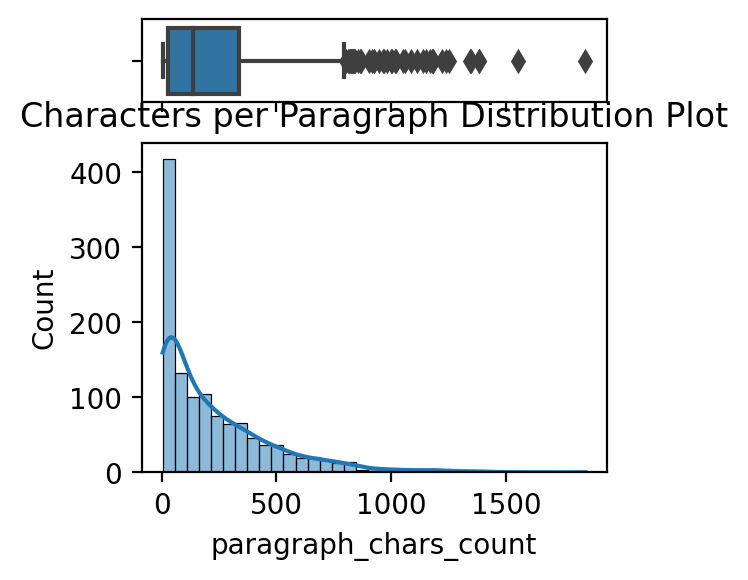

In [13]:
paragraph_analysis.characters_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Words per Paragraph

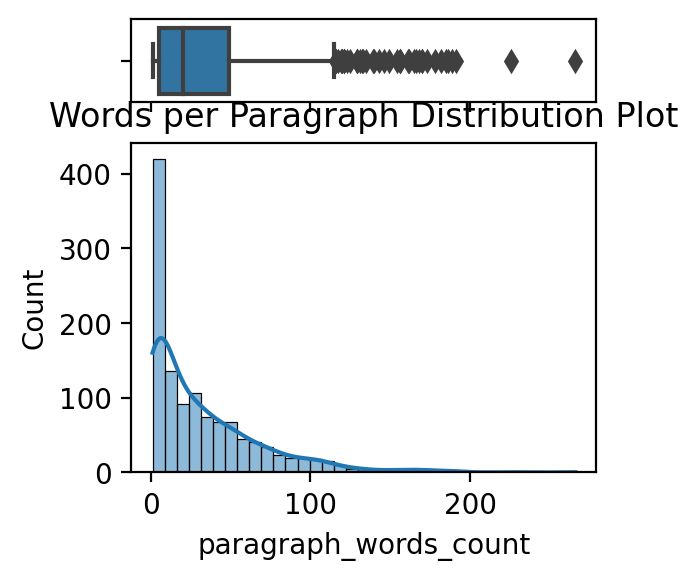

In [14]:
paragraph_analysis.words_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Histogram of Avg Word Lenghth per Paragraph

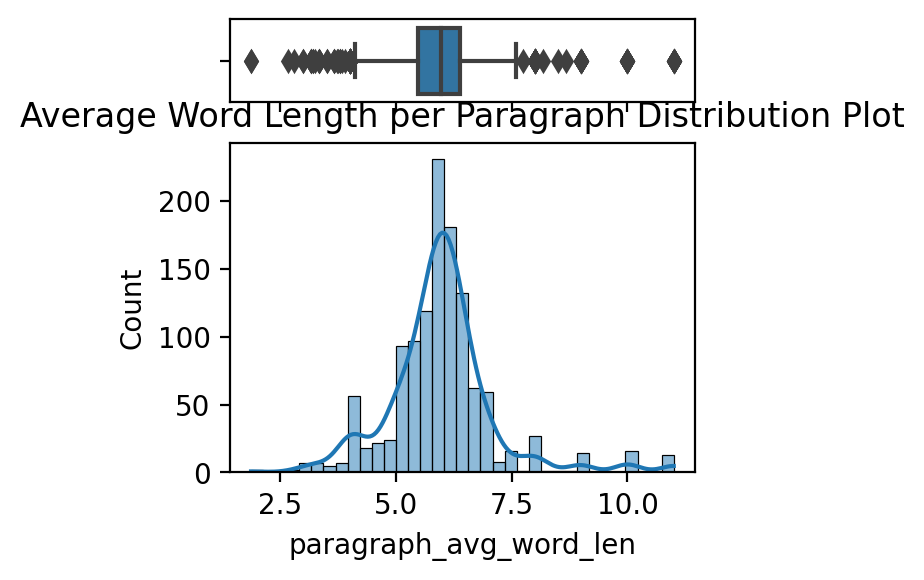

In [15]:
paragraph_analysis.avg_word_len_per_paragraph_histogram(
    figsize=(3, 3), dpi=200, save_flag=False
)

#### Checking Stop Words

In [16]:
stop_words_corpus = paragraph_analysis.get_stop_words_corpus(language='english')
styled_print(f"Found {len(stop_words_corpus.keys())} unique stop words", header=True)

› Found 0 unique stop words


In [18]:
if len(stop_words_corpus.keys()) > 0:
    top_k = 25
    top_k_stop_words = paragraph_analysis.get_top_k_stop_words(stop_words_corpus, top_k=top_k)
    paragraph_analysis.plot_top_k_stop_words(
        top_k_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Checking Non-Stop Words

In [19]:
non_stop_words_corpus = paragraph_analysis.get_non_stop_words_corpus(language='english')
styled_print(f"Found {len(non_stop_words_corpus.keys())} unique non-stop words", header=True)

› Found 6418 unique non-stop words


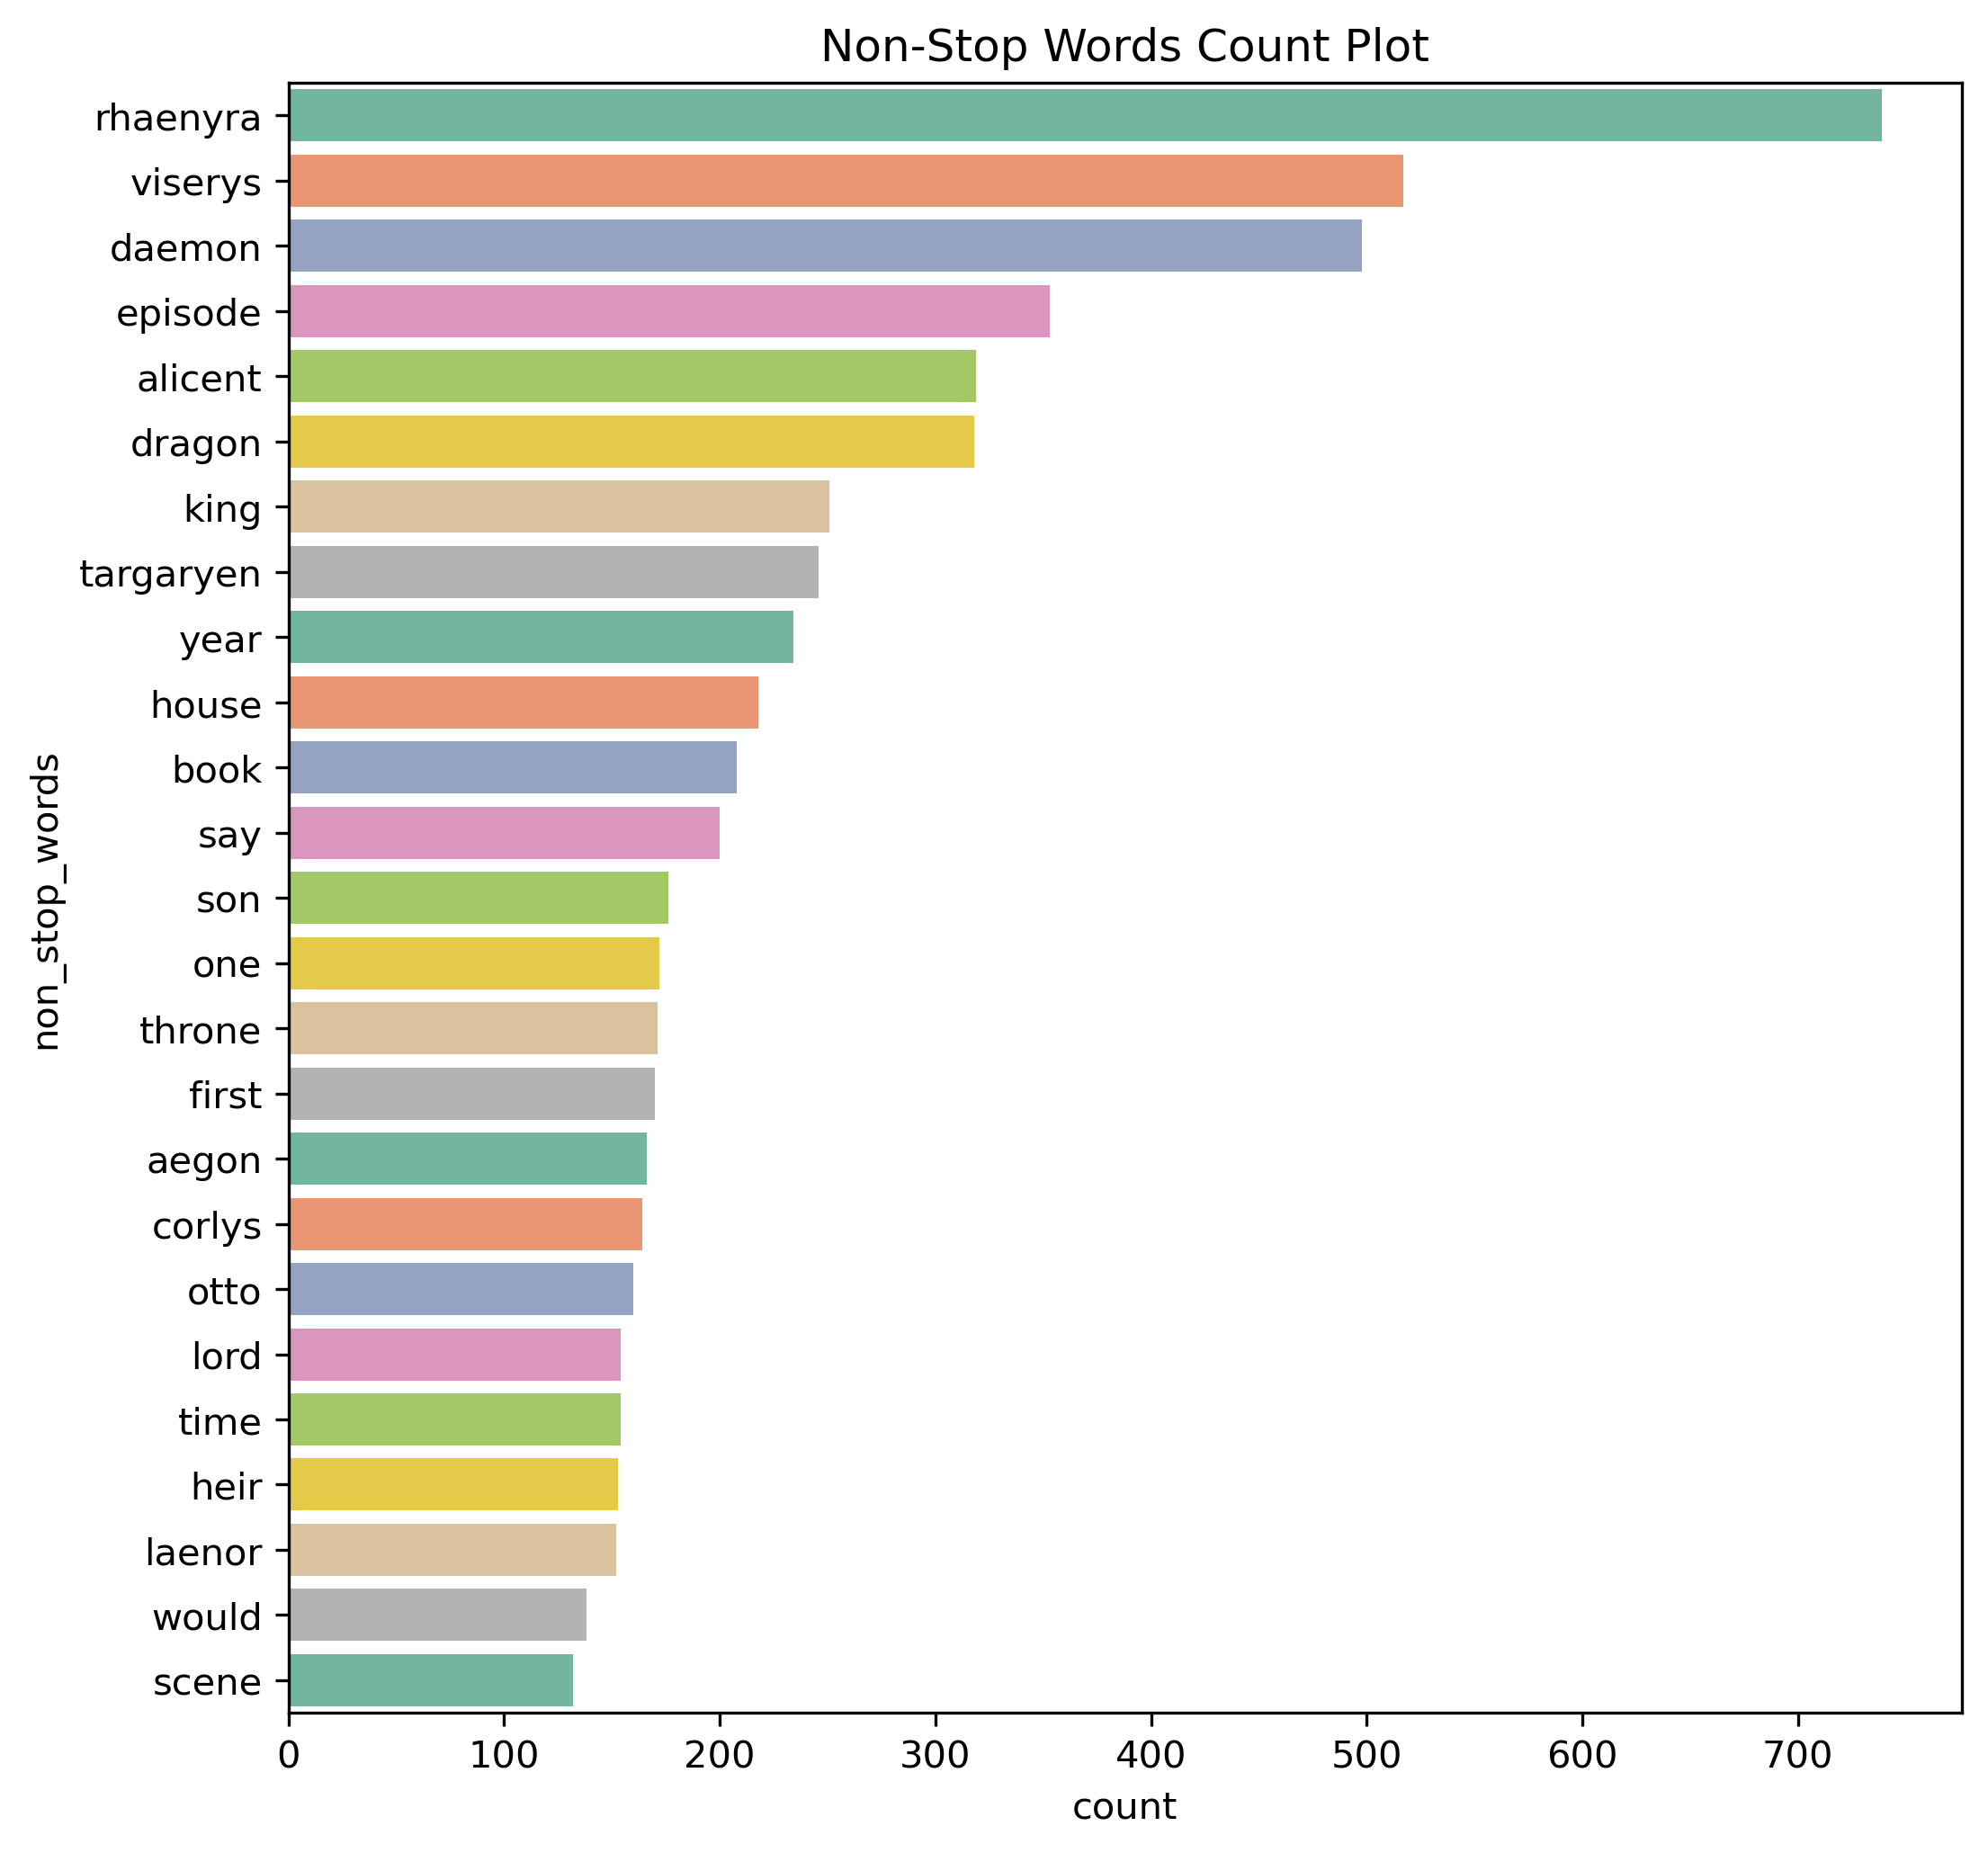

In [20]:
top_k = 25
top_k_non_stop_words = paragraph_analysis.get_top_k_non_stop_words(non_stop_words_corpus, top_k=top_k)
paragraph_analysis.plot_top_k_non_stop_words(
    top_k_non_stop_words, figsize=(8, 8), dpi=300, save_flag=False)

#### Bi-Gram Analysis

In [21]:
bigrams = paragraph_analysis.get_ngrams(n=2, return_list=True)
styled_print(f"Found {len(bigrams)} Bigrams", header=True)

› Found 39887 Bigrams


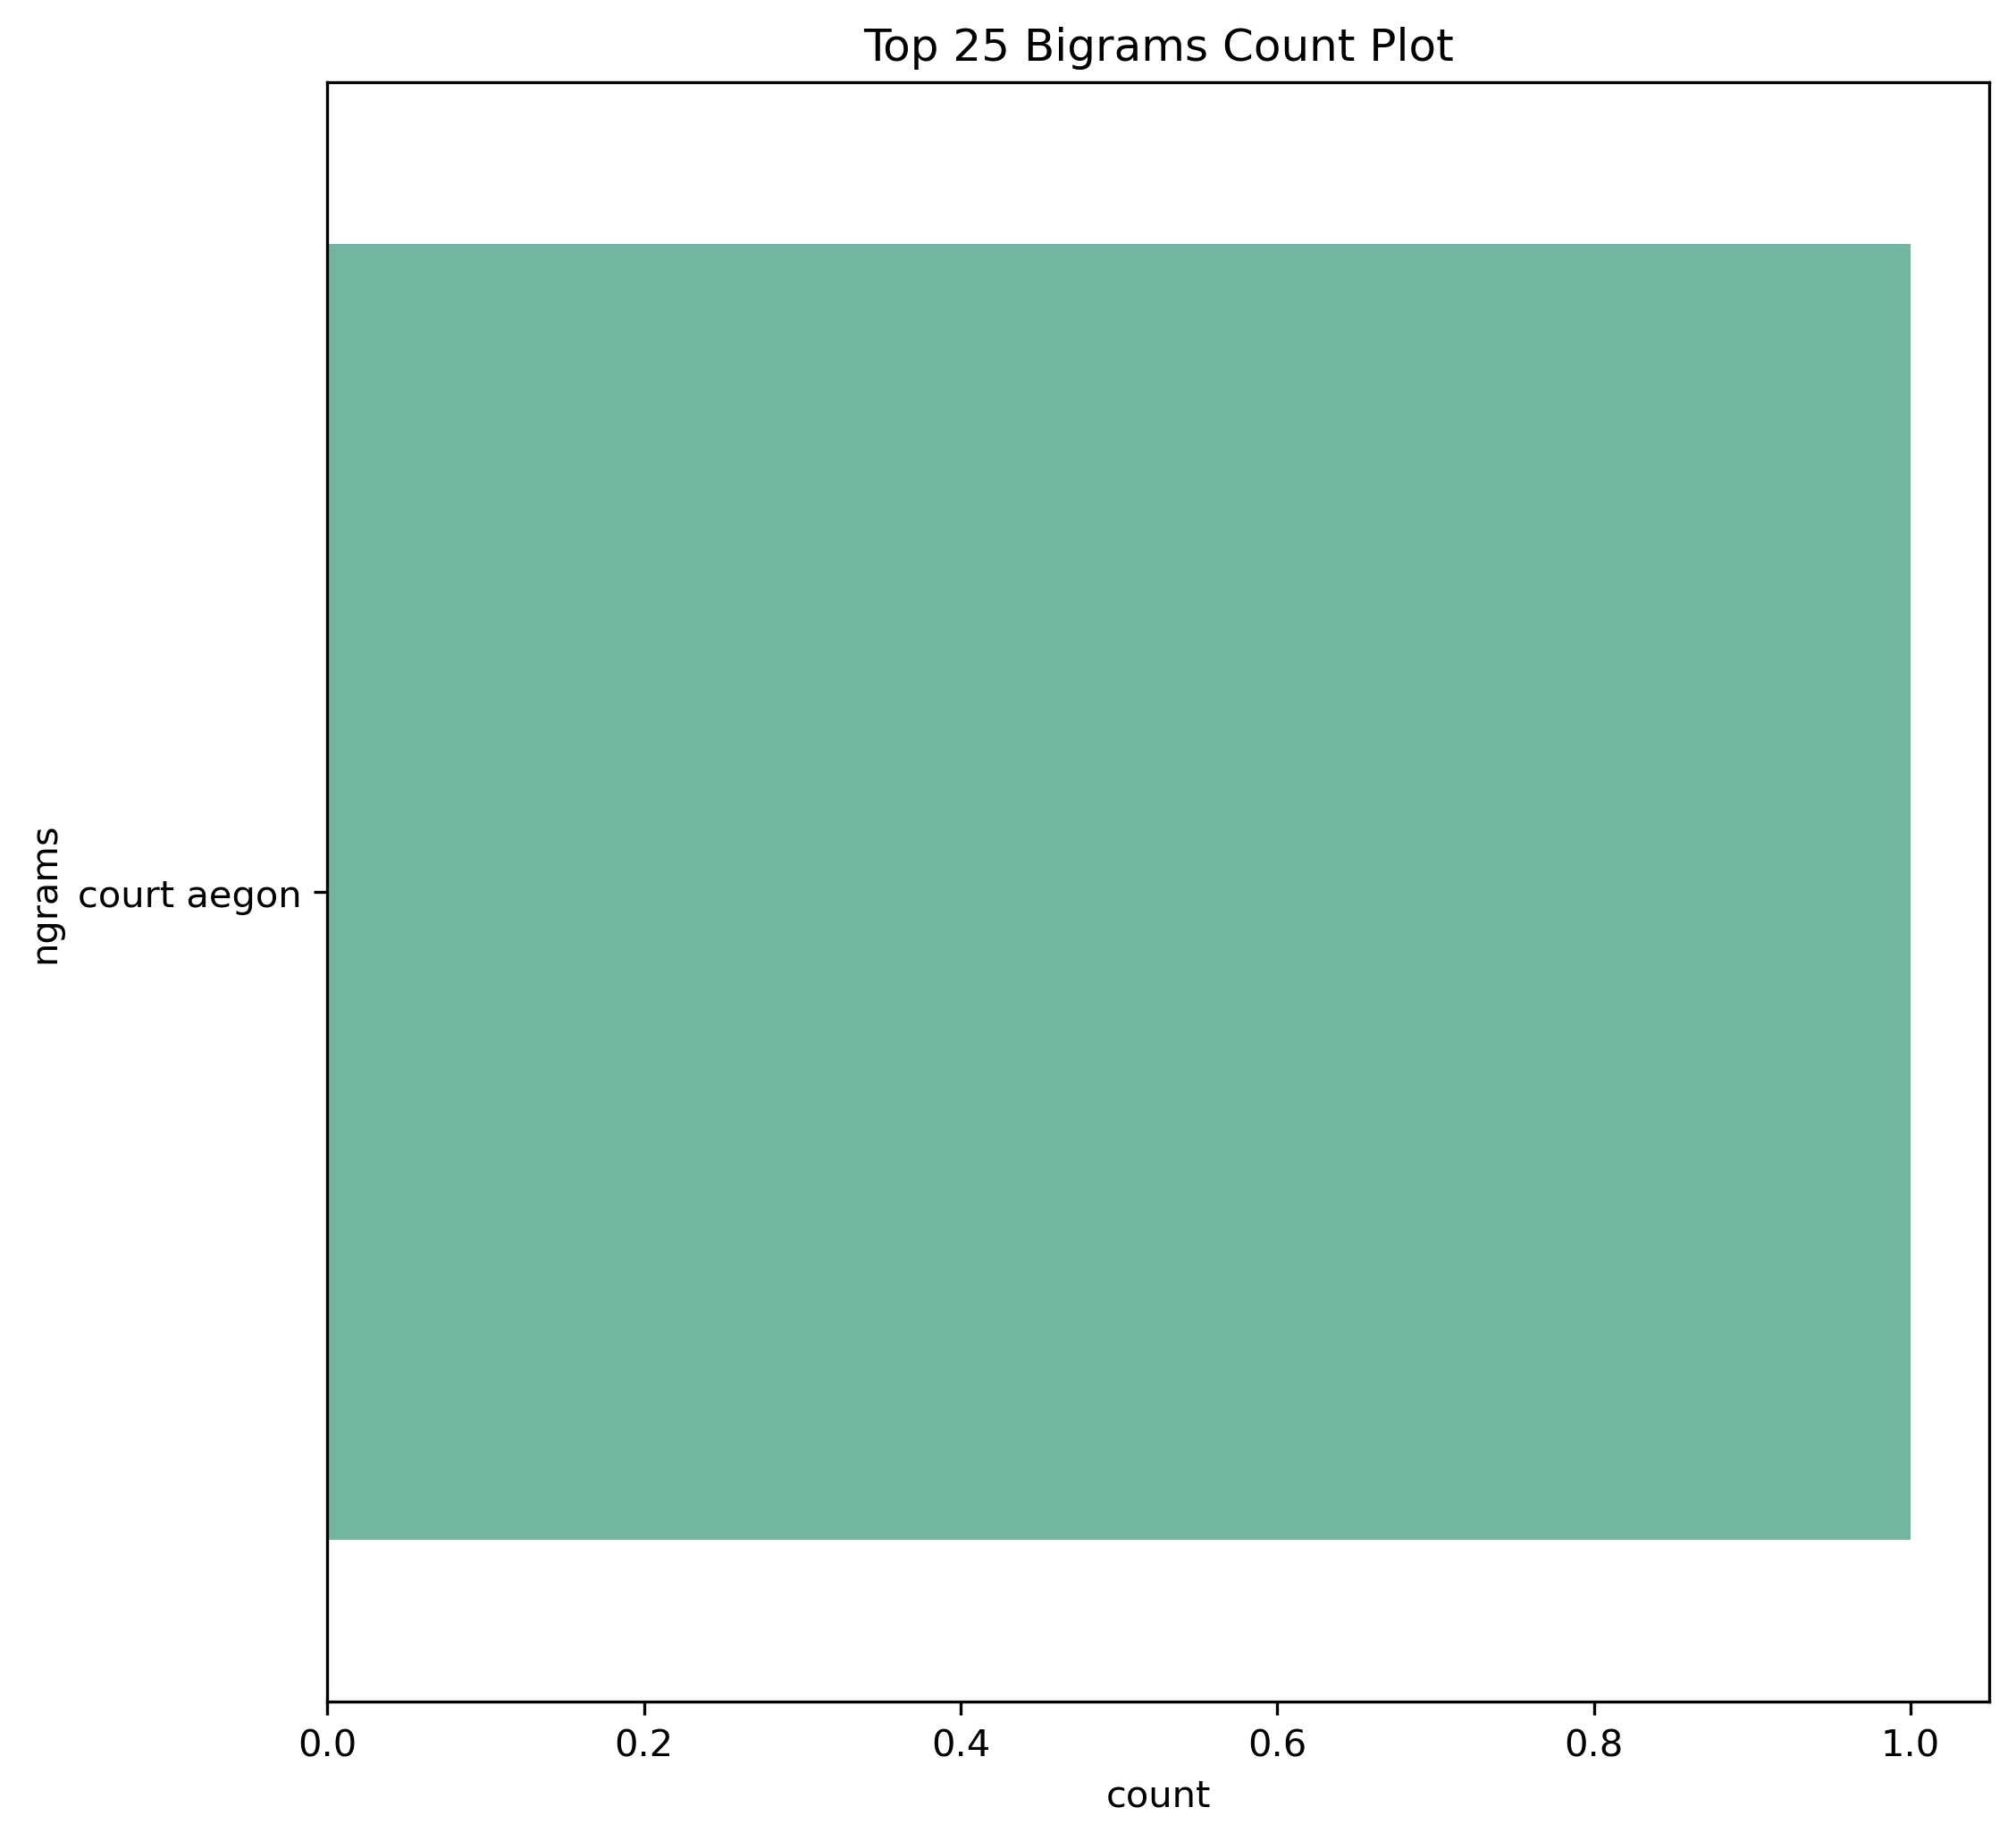

In [22]:
top_k = 25
top_k_bigrams = paragraph_analysis.get_top_k_ngrams(n=2, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_bigrams, title=f"Top {top_k} Bigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

#### Trigram Analysis

In [23]:
trigrams = paragraph_analysis.get_ngrams(n=3, return_list=True)
styled_print(f"Found {len(trigrams)} Trigrams", header=True)

› Found 39886 Trigrams


In [24]:
top_k = 25
top_k_trigrams = paragraph_analysis.get_top_k_ngrams(n=3, top_k=top_k)
paragraph_analysis.plot_top_k_ngrams(
    top_k_trigrams, title=f"Top {top_k} Trigrams Count Plot", figsize=(8, 8), dpi=300, save_flag=False)

ValueError: empty vocabulary; perhaps the documents only contain stop words